# Setup

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score, cohen_kappa_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


Bad key savefig.frameon in file C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get 

# Import Data

In [2]:
impt_data = pd.read_csv("Training Data.csv")
test_data = pd.read_csv("Test Data.csv")

In [3]:
impt_data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
impt_data['past_experience'] = impt_data['experience'] - impt_data['current_job_years']
test_data['past_experience'] = test_data['experience'] - test_data['current_job_years']

In [5]:
impt_data['started_at_age'] = impt_data['age'] - impt_data['experience']
test_data['started_at_age'] = test_data['age'] - test_data['experience']

In [6]:
def_data = impt_data[impt_data["risk_flag"] == 1]

# Exp Data Analysis

In [7]:
impt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
 13  past_experience      252000 non-null  int64 
 14  started_at_age       252000 non-null  int64 
dtypes: int64(9), object(6)
memory usag

In [8]:
impt_data.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag', 'past_experience',
       'started_at_age'],
      dtype='object')

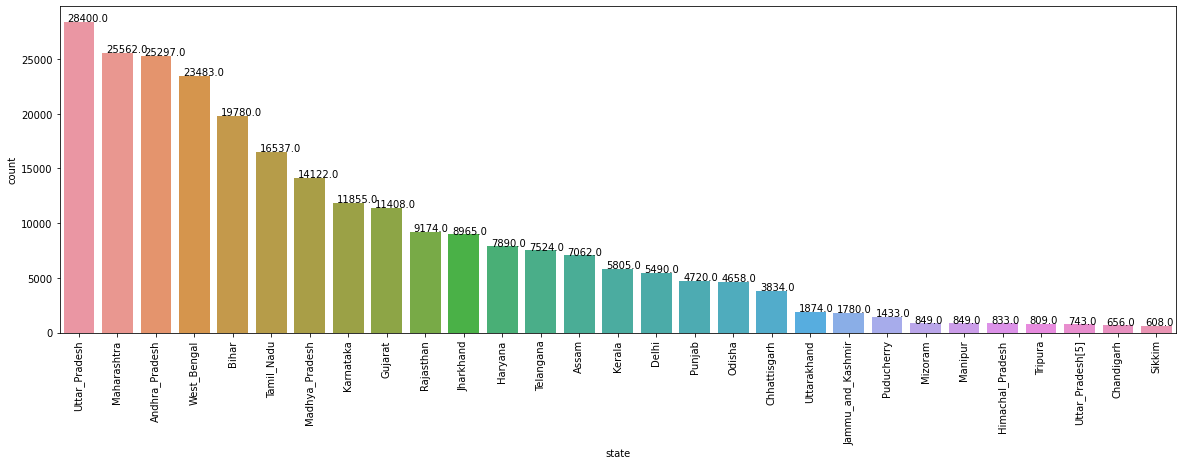

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x="state", ax = ax, data=impt_data,
              order = impt_data['state'].value_counts().index)
plt.xticks(rotation = 'vertical')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

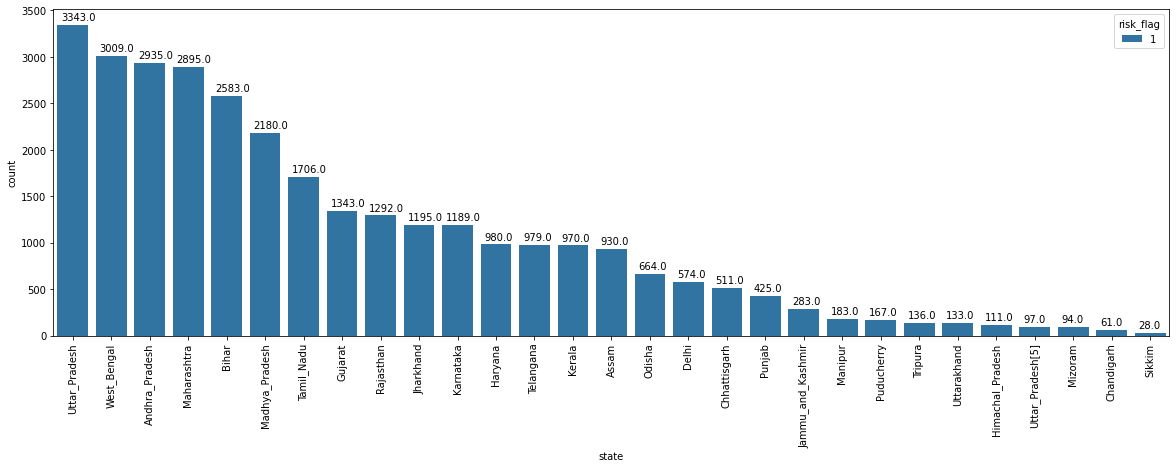

In [10]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x="state", hue="risk_flag", ax = ax, 
              data=def_data, order = def_data['state'].value_counts().index)
plt.xticks(rotation = 'vertical')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

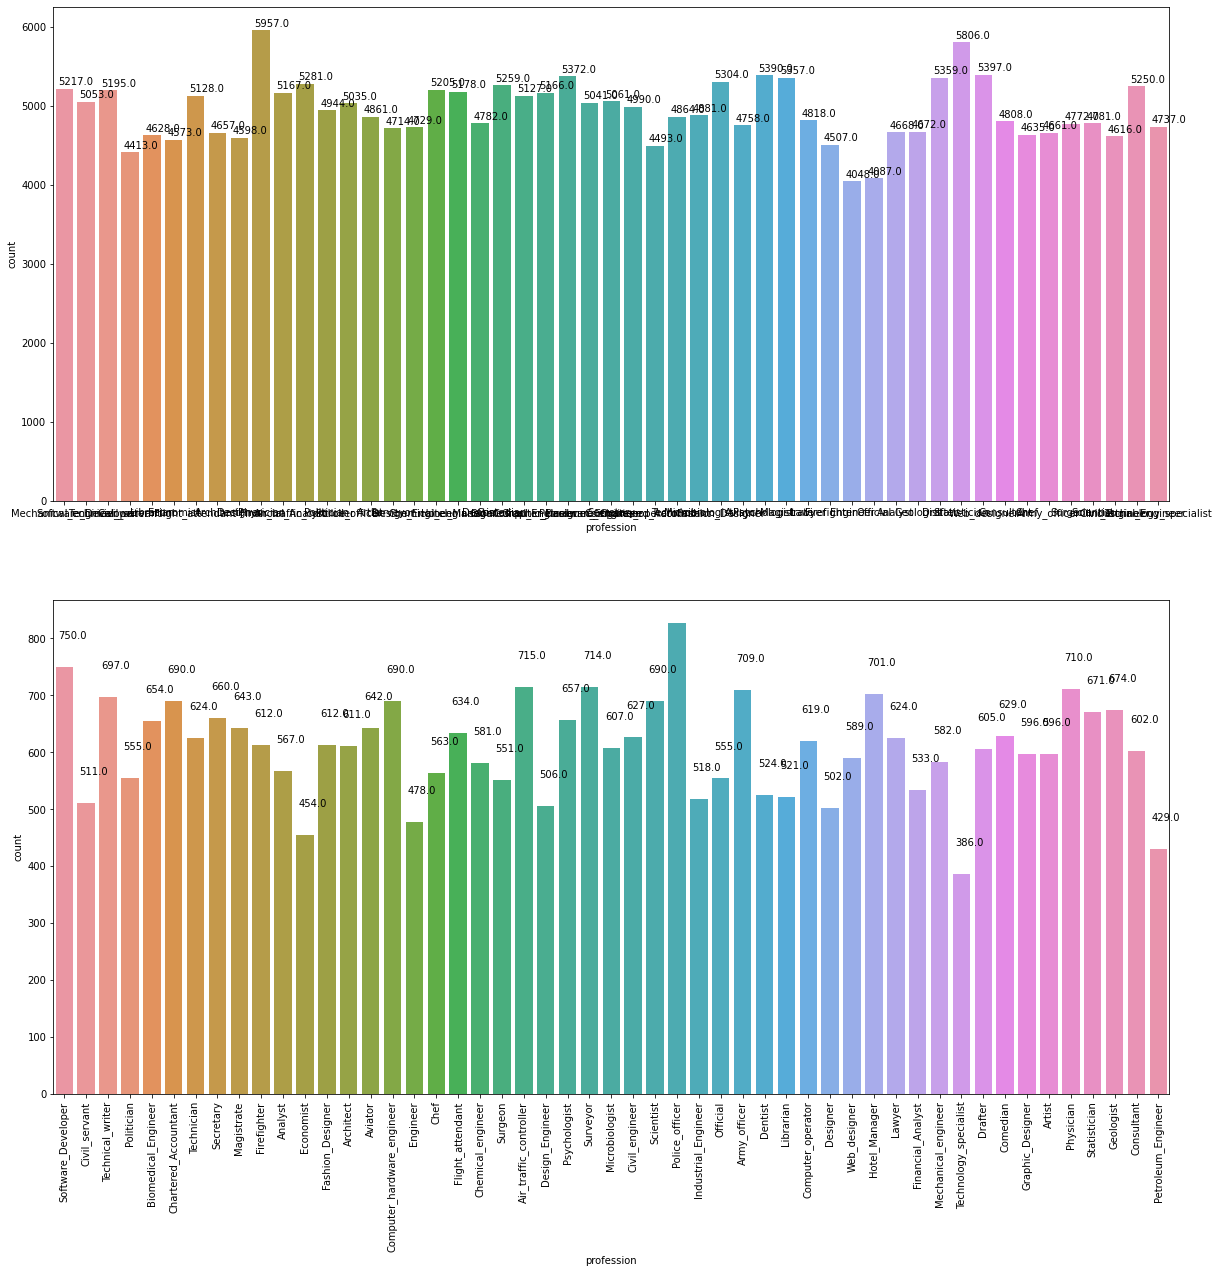

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))

sns.countplot(x="profession", ax = ax[0], data=impt_data)
plt.xticks(rotation = 'vertical')

for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
sns.countplot(x="profession", ax = ax[1], data=def_data)
# plt.xticks(rotation = 'vertical')

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


plt.show()

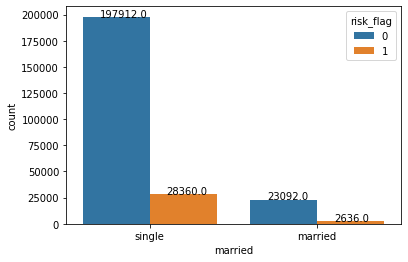

In [12]:
ax = sns.countplot(x="married", hue="risk_flag", data=impt_data)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

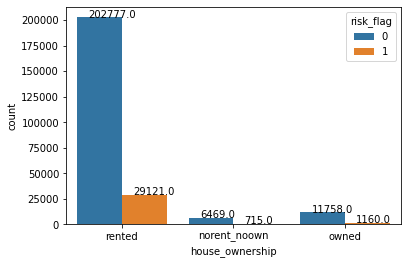

In [13]:
ax = sns.countplot(x="house_ownership", hue="risk_flag", data=impt_data)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

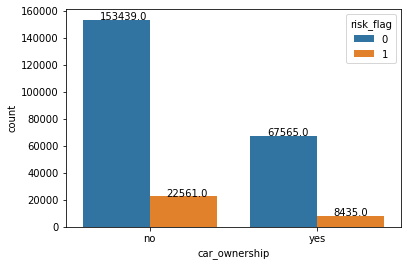

In [14]:
ax = sns.countplot(x="car_ownership", hue="risk_flag", data=impt_data)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

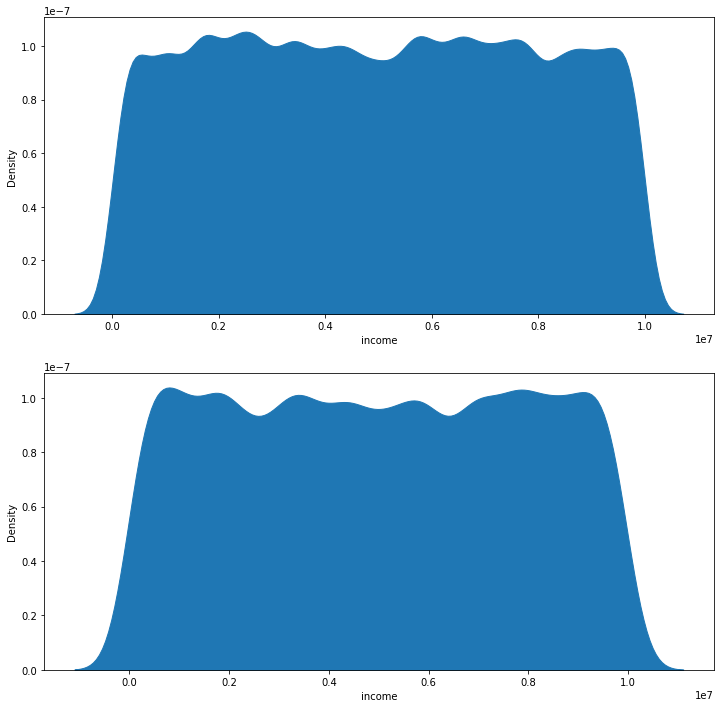

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.kdeplot(data=impt_data, x="income", ax=ax[0], shade=True, hue_order=[1, 0], alpha=1)
sns.kdeplot(data=def_data,  x="income", ax=ax[1], shade=True, hue_order=[1, 0], alpha=1)

plt.show()

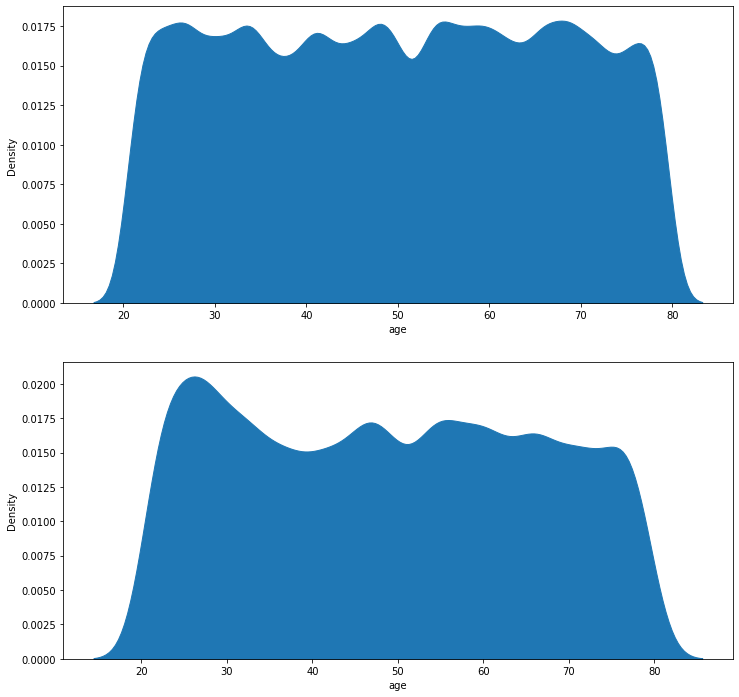

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.kdeplot(data=impt_data, x='age', ax=ax[0], shade=True, hue_order=[1, 0], alpha=1)
sns.kdeplot(data=def_data,  x='age', ax=ax[1], shade=True, hue_order=[1, 0], alpha=1)

plt.show()

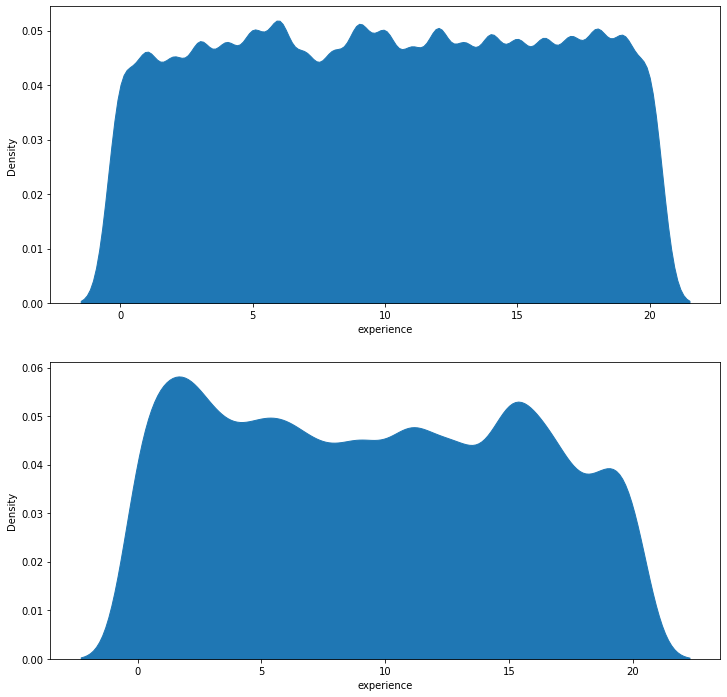

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.kdeplot(data=impt_data, x='experience', ax=ax[0], shade=True, hue_order=[1, 0], alpha=1)
sns.kdeplot(data=def_data,  x='experience', ax=ax[1], shade=True, hue_order=[1, 0], alpha=1)

plt.show()

<AxesSubplot:>

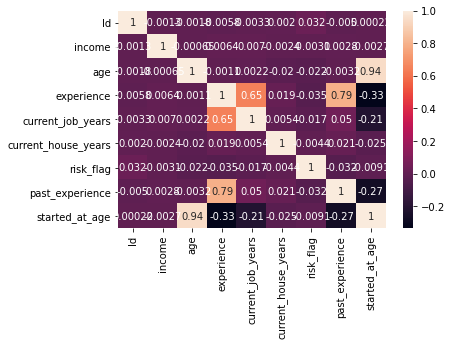

In [18]:
sns.heatmap(impt_data.corr(), annot=True)

In [19]:
impt_data["risk_flag"].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

# Pre Processing

In [20]:
bc_labels_pd = impt_data["risk_flag"]

In [21]:
include_columns = ["income", "age", "experience", "married",  "house_ownership", "car_ownership", "profession", "city", "state", "current_job_years", "current_house_years", "past_experience", "started_at_age"]
data_pd = impt_data[include_columns]
data_test_pd = test_data[include_columns]

In [22]:
# state_series = data_pd.pop("state")
# state_test_series = data_test_pd.pop("state")

# y = pd.get_dummies(state_series)
# data_pd = pd.concat([data_pd, y], axis=1, join="inner")

# y = pd.get_dummies(state_test_series)
# data_test_pd = pd.concat([data_test_pd, y], axis=1, join="inner")

In [23]:
# job_series = data_pd.pop("profession")
# job_test_series = data_test_pd.pop("profession")

# y = pd.get_dummies(job_series)
# data_pd = pd.concat([data_pd, y], axis=1, join="inner")

# y = pd.get_dummies(job_test_series)
# data_test_pd = pd.concat([data_test_pd, y], axis=1, join="inner")

In [24]:
# Categorical boolean mask
categorical_feature_mask = data_pd.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_pd.columns[categorical_feature_mask].tolist()

In [25]:
for col in categorical_cols:
    # instantiate labelencoder object
    le = LabelEncoder()
    att = pd.concat([data_pd[col], data_test_pd[col]], axis=0)
    le.fit(att)

    # apply le on categorical feature columns
    data_pd[col] = le.transform(data_pd[col])

    data_test_pd[col] = le.transform(data_test_pd[col])

C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sriram Pingali\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
data = data_pd.to_numpy()
X_test = data_test_pd.to_numpy()
data = preprocessing.scale(data)
X_test = preprocessing.scale(X_test)
labels = bc_labels_pd.to_numpy()
print(data_pd.shape)
print(X_test.shape)
print(labels.shape)

(252000, 13)
(28000, 13)
(252000,)


In [27]:
impt_data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,past_experience,started_at_age
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,20
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1,30
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0,62
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,39
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,8,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,7,30
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,4,16
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0,39
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0,45


In [28]:
data_pd

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,past_experience,started_at_age
0,1303835,23,3,1,2,0,50,262,17,3,13,0,20
1,7574516,40,10,1,2,0,63,236,18,9,13,1,30
2,3991815,66,4,0,2,0,68,8,15,4,10,0,62
3,6256451,41,2,1,2,1,63,55,21,2,12,0,39
4,5768871,47,11,1,2,0,18,312,27,3,14,8,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,65,167,36,6,11,7,30
251996,2843572,26,10,1,2,0,5,262,17,6,11,4,16
251997,4522448,46,7,1,2,0,27,146,18,7,12,0,39
251998,6507128,45,0,1,2,0,41,242,22,0,10,0,45


# Accuracy Score

In [29]:
def accuracy(Y_hat, Y):
    accuracy = accuracy_score(np.argmax(Y_hat.cpu().detach().numpy(), 1), np.argmax(Y.cpu().detach().numpy(), 1))
    f1_scr = f1_score(np.argmax(Y_hat.cpu().detach().numpy(), 1), np.argmax(Y.cpu().detach().numpy(), 1), average='weighted')
    kappa = cohen_kappa_score(np.argmax(Y_hat.cpu().detach().numpy(), 1), np.argmax(Y.cpu().detach().numpy(), 1))
    return(accuracy, f1_scr, kappa)

In [30]:
def accuracy_ml(Y_hat, Y):
    accuracy = accuracy_score(Y_hat, Y)
    f1_scr = f1_score(Y_hat, Y, average='weighted')
    roc = roc_auc_score(Y_hat, Y)
    return(accuracy, f1_scr, roc)

In [31]:
def visualize(model, proba):    
    Y_pred =  np.where(model.predict_proba(X_Test)[:,1] >= proba, 1, 0 )
    print("Val: ", accuracy_ml(Y_val, np.where(model.predict_proba(X_val)[:,1] >= proba, 1, 0 )))
    print("Test: ", accuracy_ml(Y_Test, Y_pred))
    cm = confusion_matrix(Y_Test, Y_pred)
    print(cm)
    plt.imshow(cm, cmap='binary')

# Train Test Split

In [32]:
X_temp, X_Test, Y_temp, Y_Test = train_test_split(data, labels, random_state = 100, test_size = 0.3, shuffle=True, stratify=labels)

In [34]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


# smote_enn = SMOTEENN(random_state=0)
# X_temp, Y_temp = smote_enn.fit_resample(X_temp, Y_temp)

# over = SMOTE(sampling_strategy=0.4)
over = ADASYN(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('o', over), ('u', under)]
# # steps = [('u', under)]
pipeline = Pipeline(steps=steps)

X_temp, Y_temp = pipeline.fit_resample(X_temp, Y_temp)

In [35]:
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, random_state = 100, test_size = 0.3, shuffle=True, stratify=Y_temp)

In [36]:
Y_train.shape

(128452,)

In [37]:
np.count_nonzero(Y_train == 1)

42817

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators = 200)
clf1.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

Val:  (0.8550098089079415, 0.8591145214777138, 0.891256369036266)
Test:  (0.8098677248677248, 0.8397533819256329, 0.8916004283494969)
[[51927 14374]
 [    0  9299]]


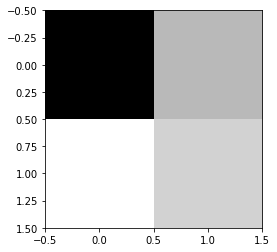

In [44]:
visualize(clf1, 0.05)

In [45]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, Y_train) 

BalancedRandomForestClassifier(random_state=0)

Val:  (0.8551914553513043, 0.859290129428983, 0.8913926051061278)
Test:  (0.8101719576719577, 0.8399858637416786, 0.8915427404397537)
[[51955 14346]
 [    5  9294]]


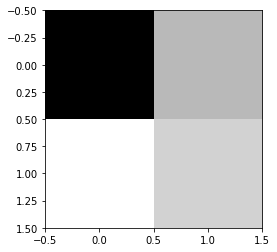

In [54]:
visualize(brf, 0.15)

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=0,
                            min_samples_split=2)
clf2.fit(X_train,Y_train)

ExtraTreesClassifier(random_state=0)

Val:  (0.8549916442636053, 0.85909696026901, 0.8912427454292798)
Test:  (0.8098677248677248, 0.8397533819256329, 0.8916004283494969)
[[51927 14374]
 [    0  9299]]


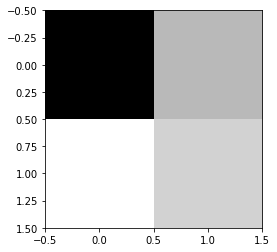

In [64]:
visualize(clf2, 0.005)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
clf3=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.6,max_features=1.0,n_estimators=100)
clf3.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.6,
                  n_estimators=100)

Val:  (0.8551914553513043, 0.8592894055803483, 0.891338113647745)
Test:  (0.8099603174603175, 0.8398089186915341, 0.8910984836028216)
[[51946 14355]
 [   12  9287]]


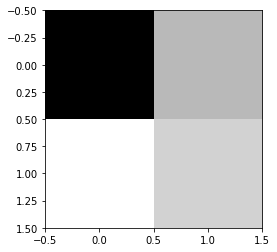

In [66]:
visualize(clf3, 0.05)

In [67]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('rf', clf1), ('et', clf2), ('bg', clf3)], voting='soft')
model.fit(X_train,Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                             ('et', ExtraTreesClassifier(random_state=0)),
                             ('bg',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=0.6,
                                                n_estimators=100))],
                 voting='soft')

Val:  (0.8556455714597109, 0.8597289319146768, 0.8917195724161868)
Test:  (0.8106349206349206, 0.8403404396880123, 0.8914830931863876)
[[51997 14304]
 [   12  9287]]


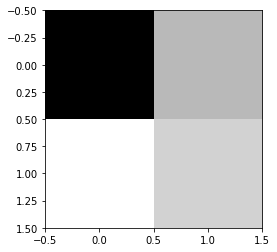

In [74]:
visualize(model, 0.1)

# Saving Model

In [75]:
import csv
# Y_test_pred = clf1.predict(X_test)
predtst = model.predict_proba(X_test)[:,1]
Y_test_pred = np.where(predtst >= 0., 1, 0)

with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'risk_flag'])
    for i, row in enumerate(Y_test_pred):
        writer.writerow([i + 1, row])

file.close()

In [76]:
Y_test_pred

array([1, 1, 1, ..., 1, 1, 1])